In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, classification_report
import pandas as pd
from pathlib import Path
import tensorflow as tf

In [ ]:
# Upload "fileclean.csv"

data = Path('sample_data/fileclean.csv')

df_clean = pd.read_csv(data)

# Handling missing values
df_clean = df_clean.dropna()

In [ ]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Ownership Type', 'Provider Type', 'County/Parish']

for col in categorical_columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

In [ ]:
# Defining the features (X) and target (y)
X = df_clean.drop('Overall Rating', axis=1)
y = df_clean['Overall Rating']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Training the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Making predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.3776357638888889, 0.8188932074503598)

In [ ]:
df_clean.head()

,Overall Rating,Ownership Type,Provider Type,Number of Certified Beds,Average Number of Residents per Day,Reported Total Nurse Staffing Hours per Resident per Day,Health Inspection Rating,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,County/Parish,Total Number of Penalties
0,2.0,0,2,57,50.0,4.37137,2.0,0,2,24644.14,534,2
1,4.0,0,2,85,76.9,4.25182,4.0,0,0,0.00,1456,0
2,4.0,6,2,50,45.1,4.59373,4.0,0,0,0.00,738,0
3,2.0,1,2,92,76.9,3.01781,3.0,0,0,0.00,743,0
4,2.0,1,2,103,86.6,3.49256,2.0,1,0,0.00,743,0


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = 11
hidden_layer_units_1 =  80
hidden_layer_units_2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer_units_1, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer_units_2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 80)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,421 (13.36 KB)

 Trainable params: 3,421 (13.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2343 - loss: -149.9682
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2283 - loss: -6573.1138
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2369 - loss: -38479.7695
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2320 - loss: -112316.8984
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2329 - loss: -234731.3594
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2317 - loss: -423808.1250
Epoch 7/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2322 - loss: -652477.5000
Epoch 8/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2361 - loss: -964323.2500
Epoch 9/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2295 - loss: -1374394.6250
Epoch 10/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2324 - loss: -1846707.7500
Epoch 11/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2236 - loss: -24

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

90/90 - 0s - 3ms/step - accuracy: 0.2330 - loss: -1.2290e+07
Loss: -12290294.0, Accuracy: 0.23298610746860504


In [ ]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
#Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4"],
    columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 0,527,130,12,2,0
Actual 1,166,329,119,19,0
Actual 2,17,123,262,101,22
Actual 3,0,10,138,232,110
Actual 4,0,0,15,150,396


Accuracy Score : 0.60625
Classification Report
              precision    recall  f1-score   support

         1.0       0.74      0.79      0.76       671
         2.0       0.56      0.52      0.54       633
         3.0       0.48      0.50      0.49       525
         4.0       0.46      0.47      0.47       490
         5.0       0.75      0.71      0.73       561

    accuracy                           0.61      2880
   macro avg       0.60      0.60      0.60      2880
weighted avg       0.61      0.61      0.61      2880



<Axes: title={'center': 'Features Importances'}, ylabel='1'>

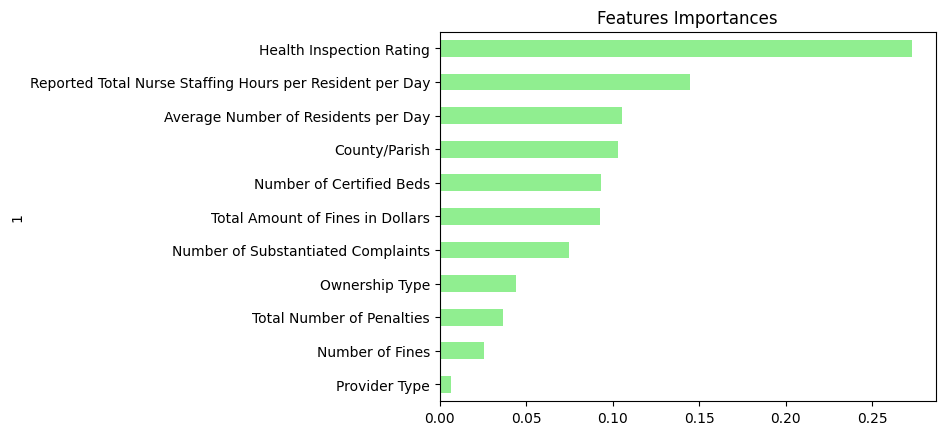

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)